In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import datetime

import _pickle as pickle
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pylab
import re
import scipy as sp
import seaborn
nltk.download('stopwords')

from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TP300LPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\TP300LPC\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
data = pd.read_csv('training_data.csv')   # read in training_data.csv
data['user_id'].value_counts()   # an user can have more than one review
data['business_id'].value_counts()   # a business can have more than one review
data['text length'] = data['text'].apply(len)
data.head()
data = data.set_index('review_id')
data

,business_id,user_id,text,date,stars,text length
review_id,,,,,,
3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5,211
9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5,426
7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5,110
3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4,442
3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4,332
8390,3789,53,This HD is very good. They seem to have knowl...,2012-05-28,4,433
3644,1205,2813,"I was initially going to give Riva's 3-stars, ...",2008-02-27,5,1105
6689,585,4484,Chino Bandido is a staple for my sister and I....,2012-05-29,5,744
9083,3501,5953,Food--The fire roasted garlic tomato soup is e...,2008-06-06,5,1496


In [4]:
test = pd.read_csv('test_data.csv')   # read in training_data.csv
test['user_id'].value_counts()   # an user can have more than one review
test['business_id'].value_counts()   # a business can have more than one review
test['text length'] = test['text'].apply(len)
test.head()
#test = test.set_index('review_id')
test

,review_id,business_id,user_id,text,date,text length
0,2713,668,2196,Ticoz is not a bad place. The menu is eclecti...,2009-01-04,335
1,4734,1014,3521,"Wow!\nBeing a Phoenix native, we have enjoyed ...",2010-10-05,1702
2,5598,2939,3028,Jodi is fantastic! Extraordinary! After too ...,2011-04-29,644
3,9545,4077,6200,T&S Glass did a wonderful job replacing my car...,2007-10-02,261
4,1471,1126,1268,My experience was on a random Saturday afterno...,2010-08-16,513
5,4533,1284,3196,I waited months before finally getting around ...,2011-12-30,629
6,7723,3598,5252,I was in Phoenix for three weeks on a business...,2011-01-25,1078
7,2433,404,1021,I work right across the street and a few of us...,2011-03-14,563
8,9182,2200,1231,I really enjoy That's A Wrap... all of the foo...,2008-06-05,413
9,2238,1555,1857,"Sadly, I have to join the crowd on this one. I...",2011-03-30,579


In [5]:
data.isnull().sum()

business_id    0
user_id        0
text           0
date           0
stars          0
text length    0
dtype: int64

In [6]:
test.isnull().sum()

review_id      0
business_id    0
user_id        0
text           0
date           0
text length    0
dtype: int64

Text(0,0.5,'Number of reviews')

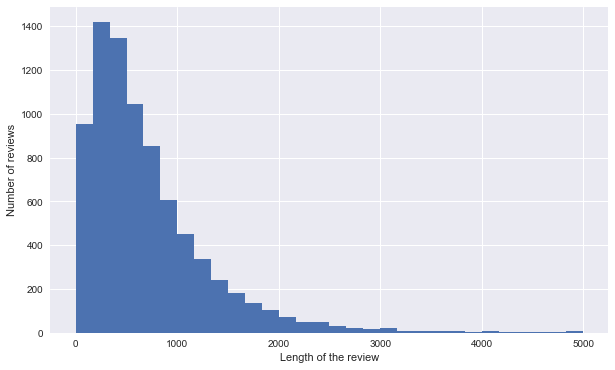

In [7]:
data.text.str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')

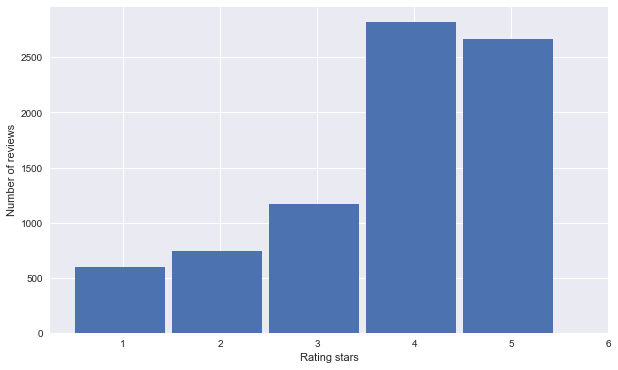

In [8]:
bins = [1, 2, 3, 4, 5, 6]
data.stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.show()

In [55]:
def central_tendency_plot(point, ci, y, color, label):
    plt.plot(ci, [y, y], "-", color=color, linewidth=4, label=label)
    plt.plot(point, y, "o", color=color, markersize=10)
    
def plot_error_dist(column, name):
    d = column.tolist()
    d = [0 if math.isnan(x) else x for x in d]
    m = mean(d)
    med = median(d)
    s = std(d)

    x = linspace(min(d), max(d), 1000)
    gauss = lambda x, m, s: (1 / (s * sqrt(2 * pi)) * exp(-0.5 * ((x - m) / s) ** 2))
    y = gauss(x, m, s)

    bins = np.arange(min(d), max(d)+1, 1)
    n, b, patches = plt.hist(d, bins=bins+1, normed=True, align='left', width=0.95)
    xticks(bins)
    bin_max = np.max(n)
    m_y = bin_max/5
    
    central_tendency_plot(m, [m - s, m + s], m_y, colors[1], "std dev")

    ci = np.percentile(d, [16, 84])
    central_tendency_plot(med, ci,  m_y - bin_max/10, colors[2], "68% CI")
    
    plt.legend(loc=0)
    plt.plot(x, y, color=colors[4])
    plt.xlabel('Error')
    plt.ylabel('Normalized Frequency')
    title = name + ' Error Distribution'
    plt.title(title)
    plt.show()

In [9]:
stoplist = set(stopwords.words("english"))

In [11]:
numTopics = 15

In [15]:
t = data

In [28]:
minReviewLen = 50
maxReviewLen = 100

print("Number of rows selected:",len(t[t.text.str.len() > minReviewLen][t.text.str.len() < maxReviewLen]))
data = t[t.text.str.len() > minReviewLen][t.text.str.len() < maxReviewLen]

Number of rows selected: 294


C:\Users\TP300LPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\TP300LPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [29]:
data

,business_id,user_id,text,date,stars,text length
review_id,,,,,,
2793,186,2252,"Outstanding service and food , drinks are not ...",2012-07-03,4,73
2933,1916,2346,"Best value for your money, Clean, comfy beds...",2012-07-07,5,90
9986,1595,5418,Awesome food! Little pricey but delicious. Lov...,2012-10-17,4,68
3695,2248,2847,Reviews are dead on good food good service in ...,2012-07-02,4,96
6321,3179,2796,"This bar is now ""Dodey's"". Sold just under a y...",2011-05-20,3,77
146,137,140,Great place for brunch or to relax with a coff...,2010-12-28,5,81
3718,1188,2861,"My favorite restaurant in AZ, No Contest!!! Aw...",2012-09-30,5,96
1180,337,1042,"Excellent food, top-notch service, exorbitantl...",2012-11-25,3,88
2102,612,1757,"Great customer service, nice owner. The broth ...",2011-01-24,5,94


In [30]:
def perform_lda(allReviewsTrain, numTopics):
    corpus = []
    for review in allReviewsTrain:
        # Remove punctuations
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        # To lowercase
        review = review.lower()
        # Remove stop words
        texts = [word for word in review.lower().split() if word not in stoplist]
        try:
            corpus.append(texts)
        except:
            pass

    # Build dictionary
    dictionary = corpora.Dictionary(corpus)
    dictionary.save('restaurant_reviews.dict')
        
    # Build vectorized corpus
    corpus_2 = [dictionary.doc2bow(text) for text in corpus]
    #corpora.MmCorpus.serialize('LDA/restaurant_reviews.mm', corpus_2)
    
    lda = models.LdaModel(corpus_2, num_topics=numTopics, id2word=dictionary)
    return lda

In [31]:
# Process the reviews and generate a topic distribution matrix (to be used as features in classification)
def process_reviews(dirty_data_set):
    clean_data_set = []
    for review in dirty_data_set:
        # Remove punctuations
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        # To lowercase
        review = review.lower()
        # Remove stop words
        texts = [word for word in review.lower().split() if word not in stoplist]
        try:
            clean_data_set.append(' '.join(texts))
        except:
            pass
    return clean_data_set

# Generates a matrix of topic probabilities for each document in matrix
# Returns topic_dist for the input corpus, and all_dist, a running sum of all the corpuses
def generate_topic_dist_matrix(lda, numTopics, corpus, all_dist, star):
    topic_dist = [0] * numTopics
    dictionary = corpora.Dictionary.load("restaurant_reviews.dict")
    for doc in corpus:
        vec = dictionary.doc2bow(doc.lower().split())
        output = lda[vec]
        highest_prob = 0
        highest_topic = 0
        temp = [0] * numTopics    # List to keep track of topic distribution for each document
        for topic in output:
            this_topic, this_prob = topic
            temp[this_topic] = this_prob
            if this_prob > highest_prob:
                highest_prob = this_prob 
                highest_topic = this_topic
        temp.append(star)
        all_dist.append(temp)
        topic_dist[highest_topic] += 1
    return topic_dist, all_dist

In [35]:
# Construct 5 groups for each rating
starsGroup = data.groupby('stars')

all_1stars_text = starsGroup.get_group(1.0)['text']
all_2stars_text = starsGroup.get_group(2.0)['text']
all_3stars_text = starsGroup.get_group(3.0)['text']
all_4stars_text = starsGroup.get_group(4.0)['text']
all_5stars_text = starsGroup.get_group(5.0)['text']

all_1stars_labels = [1.0]*len(all_1stars_text)
all_2stars_labels = [2.0]*len(all_2stars_text)
all_3stars_labels = [3.0]*len(all_3stars_text)
all_4stars_labels = [4.0]*len(all_4stars_text)
all_5stars_labels = [5.0]*len(all_5stars_text)

In [38]:
# Split into training and testing data randomly using sklearn's library
from sklearn.cross_validation import train_test_split

all_1stars_text_train, all_1stars_text_test, all_1stars_labels_train, all_1stars_labels_test = train_test_split(all_1stars_text, all_1stars_labels, test_size=0.20)
all_2stars_text_train, all_2stars_text_test, all_2stars_labels_train, all_2stars_labels_test = train_test_split(all_2stars_text, all_2stars_labels, test_size=0.20)
all_3stars_text_train, all_3stars_text_test, all_3stars_labels_train, all_3stars_labels_test = train_test_split(all_3stars_text, all_3stars_labels, test_size=0.20)
all_4stars_text_train, all_4stars_text_test, all_4stars_labels_train, all_4stars_labels_test = train_test_split(all_4stars_text, all_4stars_labels, test_size=0.20)
all_5stars_text_train, all_5stars_text_test, all_5stars_labels_train, all_5stars_labels_test = train_test_split(all_5stars_text, all_5stars_labels, test_size=0.20)

C:\Users\TP300LPC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
# Process the reviews
corpus_5stars = process_reviews(all_5stars_text_train)
corpus_4stars = process_reviews(all_4stars_text_train)
corpus_3stars = process_reviews(all_3stars_text_train)
corpus_2stars = process_reviews(all_2stars_text_train)
corpus_1stars = process_reviews(all_1stars_text_train)

print("Number of 5-star reviews after processing: ", len(corpus_5stars))
print("Number of 4-star reviews after processing: ", len(corpus_4stars))
print("Number of 3-star reviews after processing: ", len(corpus_3stars))
print("Number of 2-star reviews after processing: ", len(corpus_2stars))
print("Number of 1-star reviews after processing: ", len(corpus_1stars))

Number of 5-star reviews after processing:  107
Number of 4-star reviews after processing:  73
Number of 3-star reviews after processing:  23
Number of 2-star reviews after processing:  19
Number of 1-star reviews after processing:  12


In [93]:
###################### Process all training set review####################
corpus_5stars = process_reviews(all_5stars_text)
corpus_4stars = process_reviews(all_4stars_text)
corpus_3stars = process_reviews(all_3stars_text)
corpus_2stars = process_reviews(all_2stars_text)
corpus_1stars = process_reviews(all_1stars_text)

print("Number of 5-star reviews after processing: ", len(corpus_5stars))
print("Number of 4-star reviews after processing: ", len(corpus_4stars))
print("Number of 3-star reviews after processing: ", len(corpus_3stars))
print("Number of 2-star reviews after processing: ", len(corpus_2stars))
print("Number of 1-star reviews after processing: ", len(corpus_1stars))

Number of 5-star reviews after processing:  134
Number of 4-star reviews after processing:  92
Number of 3-star reviews after processing:  29
Number of 2-star reviews after processing:  24
Number of 1-star reviews after processing:  15


In [41]:
all_5_4_train = np.append(corpus_5stars, corpus_4stars)
all_5_4_3_train = np.append(all_5_4_train, corpus_3stars)
all_5_4_3_2_train = np.append(all_5_4_3_train, corpus_2stars)
all_text_train = np.append(all_5_4_3_2_train, corpus_1stars)

# pickle.dump(all_text_train, open("all_text_train.p", "wb"))

In [94]:
###################### Process all training set review####################
all_5_4 = np.append(corpus_5stars, corpus_4stars)
all_5_4_3 = np.append(all_5_4, corpus_3stars)
all_5_4_3_2 = np.append(all_5_4_3, corpus_2stars)
all_text = np.append(all_5_4_3_2, corpus_1stars)

# pickle.dump(all_text_train, open("all_text_train.p", "wb"))

In [42]:
%time lda = perform_lda(all_text_train, numTopics)
# pickle.dump(lda, open("lda.p", "wb"))

Wall time: 296 ms


In [95]:
###################### Process all training set review####################
%time lda = perform_lda(all_text, numTopics)
# pickle.dump(lda, open("lda.p", "wb"))

Wall time: 343 ms


In [44]:
# Build the final data frame containing topic distribution for each set of rating
topic_dist_list = []

# Keep a separate list to count topics
topic_dist_5stars = []
topic_dist_4stars = []
topic_dist_3stars = []
topic_dist_2stars = []
topic_dist_1stars = []

topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in range(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topic_dist_train_1_2_3_4_5_df = pd.DataFrame(topic_dist_list, columns=cols)

# pickle.dump(topic_dist_train_1_2_3_4_5_df, open("topic_dist_train_1_2_3_4_5_df.p", "wb"))

In [96]:
#############################################################################
# Build the final data frame containing topic distribution for each set of rating
topic_dist_list = []

# Keep a separate list to count topics
topic_dist_5stars = []
topic_dist_4stars = []
topic_dist_3stars = []
topic_dist_2stars = []
topic_dist_1stars = []

topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in range(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topic_dist_1_2_3_4_5_df = pd.DataFrame(topic_dist_list, columns=cols)

# pickle.dump(topic_dist_train_1_2_3_4_5_df, open("topic_dist_train_1_2_3_4_5_df.p", "wb"))

In [45]:
# Get topic distribution of test data.
# Process the test reviews
corpus_5stars = process_reviews(all_5stars_text_test)
corpus_4stars = process_reviews(all_4stars_text_test)
corpus_3stars = process_reviews(all_3stars_text_test)
corpus_2stars = process_reviews(all_2stars_text_test)
corpus_1stars = process_reviews(all_1stars_text_test)

print("Number of 5-star reviews after processing: ", len(corpus_5stars))
print("Number of 4-star reviews after processing: ", len(corpus_4stars))
print("Number of 3-star reviews after processing: ", len(corpus_3stars))
print("Number of 2-star reviews after processing: ", len(corpus_2stars))
print("Number of 1-star reviews after processing: ", len(corpus_1stars))

Number of 5-star reviews after processing:  27
Number of 4-star reviews after processing:  19
Number of 3-star reviews after processing:  6
Number of 2-star reviews after processing:  5
Number of 1-star reviews after processing:  3


In [46]:
all_5_4_test = np.append(corpus_5stars, corpus_4stars)
all_5_4_3_test = np.append(all_5_4_test, corpus_3stars)
all_5_4_3_2_test = np.append(all_5_4_3_test, corpus_2stars)
all_text_test = np.append(all_5_4_3_2_test, corpus_1stars)

# pickle.dump(all_text_test, open("all_text_test.p", "wb"))

In [47]:
topic_dist_list = []

# Keep a separate list to count topics
topic_dist_5stars = []
topic_dist_4stars = []
topic_dist_3stars = []
topic_dist_2stars = []
topic_dist_1stars = []


topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in range(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topic_dist_test_1_2_3_4_5_df = pd.DataFrame(topic_dist_list, columns=cols)

# pickle.dump(topic_dist_test_1_2_3_4_5_df, open("topic_dist_test_1_2_3_4_5_df.p", "wb"))

In [48]:
topic_dist_test_1_2_3_4_5_df.shape

(60, 16)

In [49]:
topic_dist_train_1_2_3_4_5_df.shape

(234, 16)

In [97]:
topic_dist_1_2_3_4_5_df.shape

(294, 16)

In [50]:
# Add sentiment label which will be used to train sentiment classifier
def getSentiment(x):
    if x < 3.5:
        return 0
    else:
        return 1

In [51]:
topic_dist_train_1_2_3_4_5_df['Sentiment'] = topic_dist_train_1_2_3_4_5_df['Star'].map(getSentiment)
topic_dist_test_1_2_3_4_5_df['Sentiment'] = topic_dist_test_1_2_3_4_5_df['Star'].map(getSentiment)

In [98]:
################################################
topic_dist_1_2_3_4_5_df['Sentiment'] = topic_dist_1_2_3_4_5_df['Star'].map(getSentiment)

In [52]:
# pickle.dump(topic_dist_train_1_2_3_4_5_df, open("topic_dist_train_1_2_3_4_5_df.p", "wb"))
# pickle.dump(topic_dist_test_1_2_3_4_5_df, open("topic_dist_test_1_2_3_4_5_df.p", "wb"))

Naive Bayes Model

In [53]:
vectorizer = TfidfVectorizer()

tfidfXtrain = vectorizer.fit_transform(all_text_train)
tfidfXtest = vectorizer.transform(all_text_test)

tfidfYtrain = topic_dist_train_1_2_3_4_5_df['Star']
tfidfYtest = topic_dist_test_1_2_3_4_5_df['Star']

In [103]:
###########################################################
tfidf_X_train = vectorizer.fit_transform(all_text)
tfidf_Y_train = topic_dist_1_2_3_4_5_df['Star']
tfidf_X_test = vectorizer.transform(test["text"])

In [104]:
###########################################################
KNclf = KNeighborsClassifier()
NBclf = MultinomialNB()
LRclf = LogisticRegression()
KNclf.fit(tfidf_X_train, tfidf_Y_train)
NBclf.fit(tfidf_X_train, tfidf_Y_train)
LRclf.fit(tfidf_X_train, tfidf_Y_train)
KN_pred = KNclf.predict(tfidf_X_test)
NB_pred = NBclf.predict(tfidf_X_test)
LR_pred = LRclf.predict(tfidf_X_test)

In [105]:
#################################################################
predict5 = pd.Series(KN_pred).to_frame().set_index(test['review_id'])
#predict5.to_csv('predict5.csv', header=False) 0.3784
predict6 = pd.Series(NB_pred).to_frame().set_index(test['review_id'])
#predict6.to_csv('predict6.csv', header=False)
predict7 = pd.Series(LR_pred).to_frame().set_index(test['review_id'])
#predict7.to_csv('predict7.csv', header=False)

In [90]:
KNclf = KNeighborsClassifier()
NBclf = MultinomialNB()
LRclf = LogisticRegression()
KNclf.fit(tfidfXtrain, tfidfYtrain)
NBclf.fit(tfidfXtrain, tfidfYtrain)
LRclf.fit(tfidfXtrain, tfidfYtrain)
KN_pred = KNclf.predict(tfid_X_test)
NB_pred = NBclf.predict(tfid_X_test)
LR_pred = LRclf.predict(tfid_X_test)

In [92]:
predict2 = pd.Series(KN_pred).to_frame().set_index(test['review_id'])
#predict2.to_csv('predict2.csv', header=False) 0.3704
predict3 = pd.Series(NB_pred).to_frame().set_index(test['review_id'])
#predict3.to_csv('predict3.csv', header=False)
predict4 = pd.Series(LR_pred).to_frame().set_index(test['review_id'])
#predict4.to_csv('predict4.csv', header=False)

In [59]:
clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression()]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression']

NBResults = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(tfidfXtrain, tfidfYtrain)
    preds = clf.predict(tfidfXtest)
    
    accuracy = accuracy_score(tfidfYtest, preds)
    report = classification_report(tfidfYtest, preds)
    
    data = {'accuracy':accuracy,
            'clf_report':report,
            'y_predicted':preds}
    
    NBResults[clf_names[i]] = data

cols = ['accuracy']
pd.DataFrame(NBResults).T[cols].T

C:\Users\TP300LPC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Logistic Regression,Multinomial Naive Bayes,Nearest Neighbors
accuracy,0.516667,0.5,0.466667


In [80]:
pred = clf.predict(tfid_X_test)

In [88]:
predict1 = pd.Series(pred).to_frame().set_index(test['review_id'])
#predict1.to_csv('predict1.csv', header=False)

In [107]:
# Adding Sentiment Column using Logistic Regression
sentimentXtrain = vectorizer.fit_transform(all_text)
#sentimentXtest = vectorizer.transform(all_text_test)

sentimentYtrain = topic_dist_1_2_3_4_5_df['Sentiment']
#sentimentYtest = topic_dist_test_1_2_3_4_5_df['Sentiment']

nb_classifier = LogisticRegression().fit(sentimentXtrain, sentimentYtrain)

ySentimentTrain = nb_classifier.predict(sentimentXtrain)
#ySentimentTest = nb_classifier.predict(sentimentXtest)

topic_dist_1_2_3_4_5_df['Sentiment_Predicted'] = ySentimentTrain
#topic_dist_test_1_2_3_4_5_df['Sentiment_Predicted'] = ySentimentTest

In [109]:
features = list(topic_dist_1_2_3_4_5_df.columns[:numTopics])
features.append(topic_dist_1_2_3_4_5_df.columns[numTopics+2])
print(features)

['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Sentiment_Predicted']


In [121]:
x_train = topic_dist_1_2_3_4_5_df[features]
y_train = topic_dist_1_2_3_4_5_df['Star']

#x_test = topic_dist_test_1_2_3_4_5_df[features]
#y_test = topic_dist_test_1_2_3_4_5_df['Star'] 

clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression(), LDA(), QDA(), RandomForestClassifier(n_estimators=100, n_jobs=2), AdaBoostClassifier(n_estimators=100)]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'AdaBoost']

KNclf = KNeighborsClassifier()
NBclf = MultinomialNB()
LRclf = LogisticRegression()
LDAclf = LDA()
QDAclf = QDA()
RFclf = RandomForestClassifier(n_estimators=100, n_jobs=2)
ABclf = AdaBoostClassifier(n_estimators=100)

KNclf.fit(x_train, y_train)
NBclf.fit(x_train, y_train)
LRclf.fit(x_train, y_train)
LDAclf.fit(x_train, y_train)
QDAclf.fit(x_train, y_train)
RFclf.fit(x_train, y_train)
ABclf.fit(x_train, y_train)

KNclf.predict(tfid_X_test)
NBclf.predict(tfid_X_test)
LRclf.predict(tfid_X_test)
LDAclf.predict(tfid_X_test)
QDAclf.predict(tfid_X_test)
RFclf.predict(tfid_X_test)
ABclf.predict(tfid_X_test)

C:\Users\TP300LPC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


ValueError: kd_tree does not work with sparse matrices. Densify the data, or set algorithm='brute'